In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets 

In [2]:
iris = datasets.load_iris()

In [3]:
print(np.shape(iris.data))

(150, 4)


In [4]:
iris_d = pd.DataFrame(data=np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])

In [5]:
iris_d.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

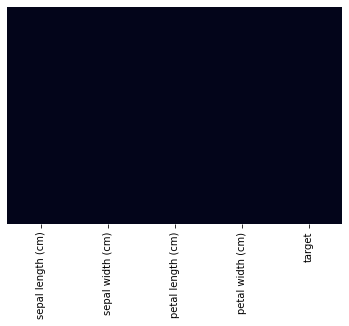

In [7]:
sns.heatmap(iris_d.isnull(), yticklabels=False, cbar=False)

# we see there is no NaN data

<AxesSubplot:ylabel='Frequency'>

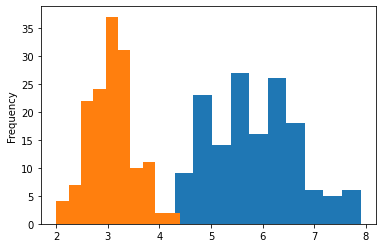

In [8]:
iris_d["sepal length (cm)"].plot.hist()
iris_d["sepal width (cm)"].plot.hist()

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_d['target'] = le.fit_transform(iris_d['target'])
iris_d.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [10]:
iris_d.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


# from the correlation matrix, we conclude that we can remove either <h3>petal width</h3> or <h3>petal length</h3>

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
Y = iris_d.target
X = iris_d.drop('target', axis=1)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,random_state=1)

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
Y_pred = model.predict(X_test)
print("Accuracy: ", model.score(X_test, Y_test) * 100)

Accuracy:  97.36842105263158


In [16]:
from sklearn.metrics import accuracy_score 

In [17]:
accuracy_score(Y_test, Y_pred)

0.9736842105263158

In [20]:
X_test2=[[5.8,4.0,1,2]]

In [21]:
# model.predict(X_test2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)